## Naive Bayes from scratch (Implementation)
Name: Suyash Chintawar

Roll no: 191IT109

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
import random
from sklearn.metrics import accuracy_score,confusion_matrix
warnings.filterwarnings('ignore')

In [ ]:
def calculate_prior_probabilities(df):

  prior_probabilities = df.groupby(by = 'class').apply(lambda x: len(x)/len(df))
  return np.log(prior_probabilities).values


In [ ]:
def return_statistics(df):

  mean = df.groupby(by='class').apply(lambda x: x.mean(axis=0))
  variance = df.groupby(by='class').apply(lambda x: x.var(axis=0))

  return (mean.values, variance.values)

In [ ]:
def calculate_probability_density(mean, variance, x):

  probability_density = (1 / np.sqrt(2*np.pi*variance) ) * np.exp( (-(x - mean)**2)  / ( 2*variance ) )

  return probability_density

In [ ]:
def calculate_posterior_probabilities(df_row, mean, variance, n_unique_labels, n_cols):
  
  posterior_probabilities = []
  
  # calculate probabilities wrt each label to find max
  for i in range(n_unique_labels):
    posterior = 0

    # for each feature
    for j in range(n_cols):
      posterior += np.log(calculate_probability_density(mean[i][j], variance[i][j], df_row[j]))
    posterior_probabilities.append(posterior)
  return posterior_probabilities

In [ ]:
def NBA_fit(df):

  n_cols = len(df.columns)-1
  unique_labels = np.sort(df['class'].unique())
  n_unique_labels = len(unique_labels)

  mean, variance = return_statistics(df)
  prior_probabilities = calculate_prior_probabilities(df) # returns log

  return {
      'n_cols': n_cols,
      'unique_labels': unique_labels,
      'n_unique_labels': n_unique_labels,
      'mean': mean,
      'variance': variance,
      'prior_probabilities': prior_probabilities
  }

In [ ]:
def predict(test_df, nba):

  predictions = []
  for i in range(len(test_df)):

    prior = nba['prior_probabilities']
    posterior = calculate_posterior_probabilities(test_df.iloc[i, :-1], nba['mean'], nba['variance'], nba['n_unique_labels'], nba['n_cols'])  # returns log
    probabilities = prior + posterior
    
    mx_idx = np.argmax(probabilities)
    predictions.append(nba['unique_labels'][mx_idx])  

  return predictions

In [ ]:
from sklearn.datasets import load_iris 

In [ ]:
#Load Iris dataset
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= ['sepal_length','sepal_width','petal_length','petal_width','class'])
df = df.sample(frac = 1,random_state=16).reset_index(drop=True)
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,6.3,3.3,4.7,1.6,1.0
1,5.2,4.1,1.5,0.1,0.0
2,7.0,3.2,4.7,1.4,1.0
3,6.7,3.0,5.0,1.7,1.0
4,6.1,2.9,4.7,1.4,1.0
...,...,...,...,...,...
145,7.2,3.2,6.0,1.8,2.0
146,6.3,2.7,4.9,1.8,2.0
147,6.7,3.1,4.4,1.4,1.0
148,5.6,2.5,3.9,1.1,1.0


In [ ]:
def train_test_split(df, test_size):

  if isinstance(test_size, float):
    test_size = round(test_size*len(df))
  
  indices = df.index.tolist() 
  test_indices = random.sample(population=indices, k=test_size)

  test = df.loc[test_indices]
  train = df.drop(test_indices)

  return train, test

Accuracy: 96.66666666666667
TPR: [1.         0.88888889 1.        ]
FPR: [0.         0.         0.05882353]


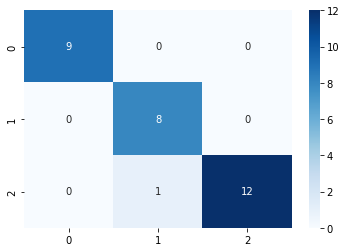

In [ ]:

# train test split
train_df, test_df = train_test_split(df, 0.2)
labels = [i for i in train_df.loc[:,'class']]


# fit model
nba = NBA_fit(train_df)

# make predictions
predictions = predict(test_df, nba)

# accuracy
accuracy = len(test_df.loc[predictions == test_df['class']])/len(test_df) * 100
print('Accuracy:',accuracy)
cm = confusion_matrix(list(test_df['class']), predictions)
tpr = np.diag(cm)/np.sum(cm,axis=0)
print('TPR:',tpr)
fpr = (np.sum(cm,axis=1)-np.diag(cm))/(np.sum(cm)-np.sum(cm,axis=0)-np.sum(cm,axis=1)+np.diag(cm))
print('FPR:',fpr)
sn.heatmap(cm, annot = True, cmap = "Blues")



In [ ]:
!wget 'https://archive.ics.uci.edu/ml/machine-learning-databases/spect/SPECTF.train'

--2022-09-27 04:54:09--  https://archive.ics.uci.edu/ml/machine-learning-databases/spect/SPECTF.train
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10797 (11K) [application/x-httpd-php]
Saving to: ‘SPECTF.train’

SPECTF.train        100%[===================>]  10.54K  --.-KB/s    in 0s      

2022-09-27 04:54:10 (107 MB/s) - ‘SPECTF.train’ saved [10797/10797]



In [ ]:
features = ['F'+str(i) for i in range(1,45)]
df=pd.read_csv('SPECTF.train',header=None, names=['class']+features)
df = df.reindex(columns=features +['class'])
df = df.sample(frac=1,random_state=16).reset_index(drop=True)
df

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F36,F37,F38,F39,F40,F41,F42,F43,F44,class
0,61,60,60,62,64,72,68,67,74,68,...,66,66,60,60,58,60,67,49,52,1
1,75,72,75,79,72,68,79,77,69,66,...,64,72,69,73,61,52,44,34,37,1
2,74,73,72,75,63,62,67,67,73,74,...,66,71,73,66,69,62,65,55,56,0
3,59,68,69,67,69,59,78,73,66,65,...,64,73,71,81,75,74,65,69,66,0
4,57,69,68,75,69,74,73,71,57,61,...,58,69,67,79,77,72,70,61,65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,72,63,68,62,72,63,79,61,57,49,...,46,63,62,53,43,38,35,32,26,1
76,74,81,80,78,70,69,74,77,69,71,...,67,70,74,63,72,68,70,61,64,0
77,62,66,66,68,73,76,68,71,62,62,...,71,63,63,70,72,75,79,62,59,0
78,69,64,73,72,49,70,66,71,57,56,...,64,59,58,69,66,74,75,62,59,0


Accuracy: 87.5
TPR: [0.83333333 1.        ]
FPR: [0.  0.2]


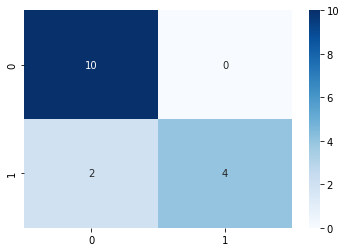

In [ ]:
train_df, test_df = train_test_split(df, 0.2)
labels = [i for i in test_df.loc[:,'class']]
# print('test labels',labels)


# fit model
nba = NBA_fit(train_df)

# make predictions
predictions = predict(test_df, nba)

# accuracy
accuracy = len(test_df.loc[predictions == test_df['class']])/len(test_df) * 100
print('Accuracy:',accuracy)
cm = confusion_matrix(list(test_df['class']), predictions)
tpr = np.diag(cm)/np.sum(cm,axis=0)
print('TPR:',tpr)
fpr = (np.sum(cm,axis=1)-np.diag(cm))/(np.sum(cm)-np.sum(cm,axis=0)-np.sum(cm,axis=1)+np.diag(cm))
print('FPR:',fpr)
sn.heatmap(cm, annot = True, cmap = "Blues")